<a href="https://colab.research.google.com/github/sunheehee/kaggle-study/blob/main/%5Bkaggle%5D_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ÌïÑÏÇ¨Ìïú ÏΩîÎìú ÏõêÎ≥∏: https://www.kaggle.com/code/miguelfzzz/house-price-prediction-lasso-ridge-and-more#Missing-values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DArt-B 5·ÑÄ·Öµ/kaggle study/house price /train.csv')
test = pd.read_csv('/content/drive/MyDrive/DArt-B 5·ÑÄ·Öµ/kaggle study/house price /test.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# EDA

<ipython-input-54-ac3a562b63d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SalePrice', y=corr.index, data=corr, palette=colors)
<ipython-input-54-ac3a562b63d6>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='SalePrice', y=corr.index, data=corr, palette=colors)


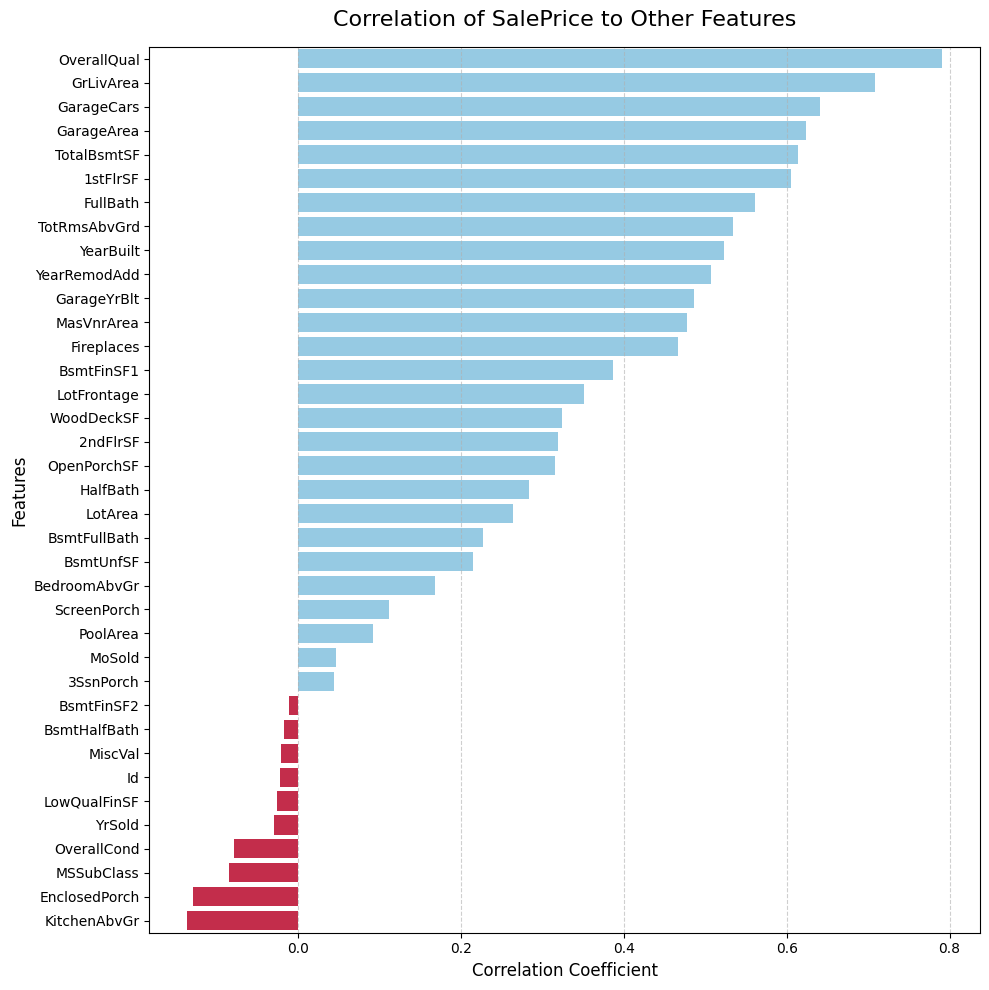

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Î≥ÄÏàòÏôÄ SalePriceÍ∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî ÌõÑ ÏòÅÌñ•ÌôïÏù∏(ÏñëÏùò ÏòÅÌñ•/ÏùåÏùò ÏòÅ)
# corr = train[train.columns].corr()['SalePrice'][:].sort_values(ascending=True).to_frame() #Í∏∞Ï°¥ ÏΩîÎìúÏßÄÎßå ÏàòÏπòÌòïÏù¥ ÏïÑÎãå Î≥ÄÏàòÎèÑ ÏûàÏñ¥ÏÑú ÏóêÎü¨ Î∞úÏÉù
num_train = train.select_dtypes(include='number')
corr = train[num_train.columns].corr()['SalePrice'][:].sort_values(ascending=False).to_frame()
corr = corr.drop(corr[corr.SalePrice > 0.99].index)

# ÏÉâÏÉÅ ÏÑ§Ï†ï: ÏùåÏàòÎ©¥ Îπ®Í∞ï, ÏñëÏàòÎ©¥ ÌïòÎäòÏÉâ
colors = np.where(corr['SalePrice'] < 0, 'crimson', '#89CFF0')

#Í∏∞Ï°¥ÏΩîÎìú Ïò§Î•òÎÇòÏÑú ÏßÄÌîºÌã∞ÏóêÏÑú Î∞îÍøà
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 10))
sns.barplot(x='SalePrice', y=corr.index, data=corr, palette=colors)

# Ï†úÎ™©, Î†àÏù¥Î∏î
plt.title("Correlation of SalePrice to Other Features", fontsize=16, pad=15)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Í≤©ÏûêÏÑ†, Ïä§ÌÉÄÏùº
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**ÏΩîÎìú Ïù¥Ìï¥ÌïòÍ∏∞**

‚úÖtrain[train.columns]Îäî ÏÇ¨Ïã§ train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎèôÏùºÌïòÏßÄÎßå, Ïù¥ÌõÑÏùò Ïû¨ÏÇ¨Ïö© Í∞ÄÎä•ÏÑ±Í≥º Ïú†ÏßÄÎ≥¥ÏàòÎ•º Í≥†Î†§ÌñàÏùÑ Îïå train[train.columns]Ïùò ÌòïÏãùÏúºÎ°ú ÏûëÏÑ±

‚úîÔ∏è train.corr() ‚Üí Ï†ÑÏ≤¥ ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞

‚úîÔ∏è['SalePrice'][:] ‚Üí SalePriceÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå Í∞ÄÏ†∏Ïò¥

‚úîÔ∏è.to_frame() : series ‚Üí DFÌòïÏãùÏúºÎ°ú Í∞ÄÏ†∏Ïò¥


**Í∑∏ÎûòÌîÑ Ìï¥ÏÑùÌïòÍ∏∞**

ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.6Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§Ïóê ÌïúÌï¥ÏÑú ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ Î≥ÄÏàòÎì§Ïù¥ÎùºÍ≥† Ïπ≠Ìï®.

ÏßëÍ∞íÏùÑ ÏóêÏ∏°ÌïòÎäî Îç∞ ÏûàÏñ¥ ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ Î≥ÄÏàòÎì§

- OverallQual: Ï†ÑÎ∞òÏ†ÅÏù∏ ÏûêÏû¨ Î∞è ÎßàÍ∞ê ÌíàÏßà

- GrLivArea: ÏßÄÏÉÅÏ∏µ Í±∞Ï£º Î©¥Ï†Å (ÌèâÎ∞©ÌîºÌä∏ Í∏∞Ï§Ä)

- GarageCars: Ï∞® ÏàòÏö© Í∏∞Ï§ÄÏúºÎ°ú Î≥∏ Ï∞®Í≥† ÌÅ¨Í∏∞

- GarageArea: Ï∞®Í≥†Ïùò Ï†ÑÏ≤¥ Î©¥Ï†Å (ÌèâÎ∞©ÌîºÌä∏ Í∏∞Ï§Ä)

- TotalBsmtSF: ÏßÄÌïòÏã§ Ï†ÑÏ≤¥ Î©¥Ï†Å (ÌèâÎ∞©ÌîºÌä∏ Í∏∞Ï§Ä)

- 1stFlrSF: 1Ï∏µÏùò Î©¥Ï†Å (ÌèâÎ∞©ÌîºÌä∏ Í∏∞Ï§Ä)



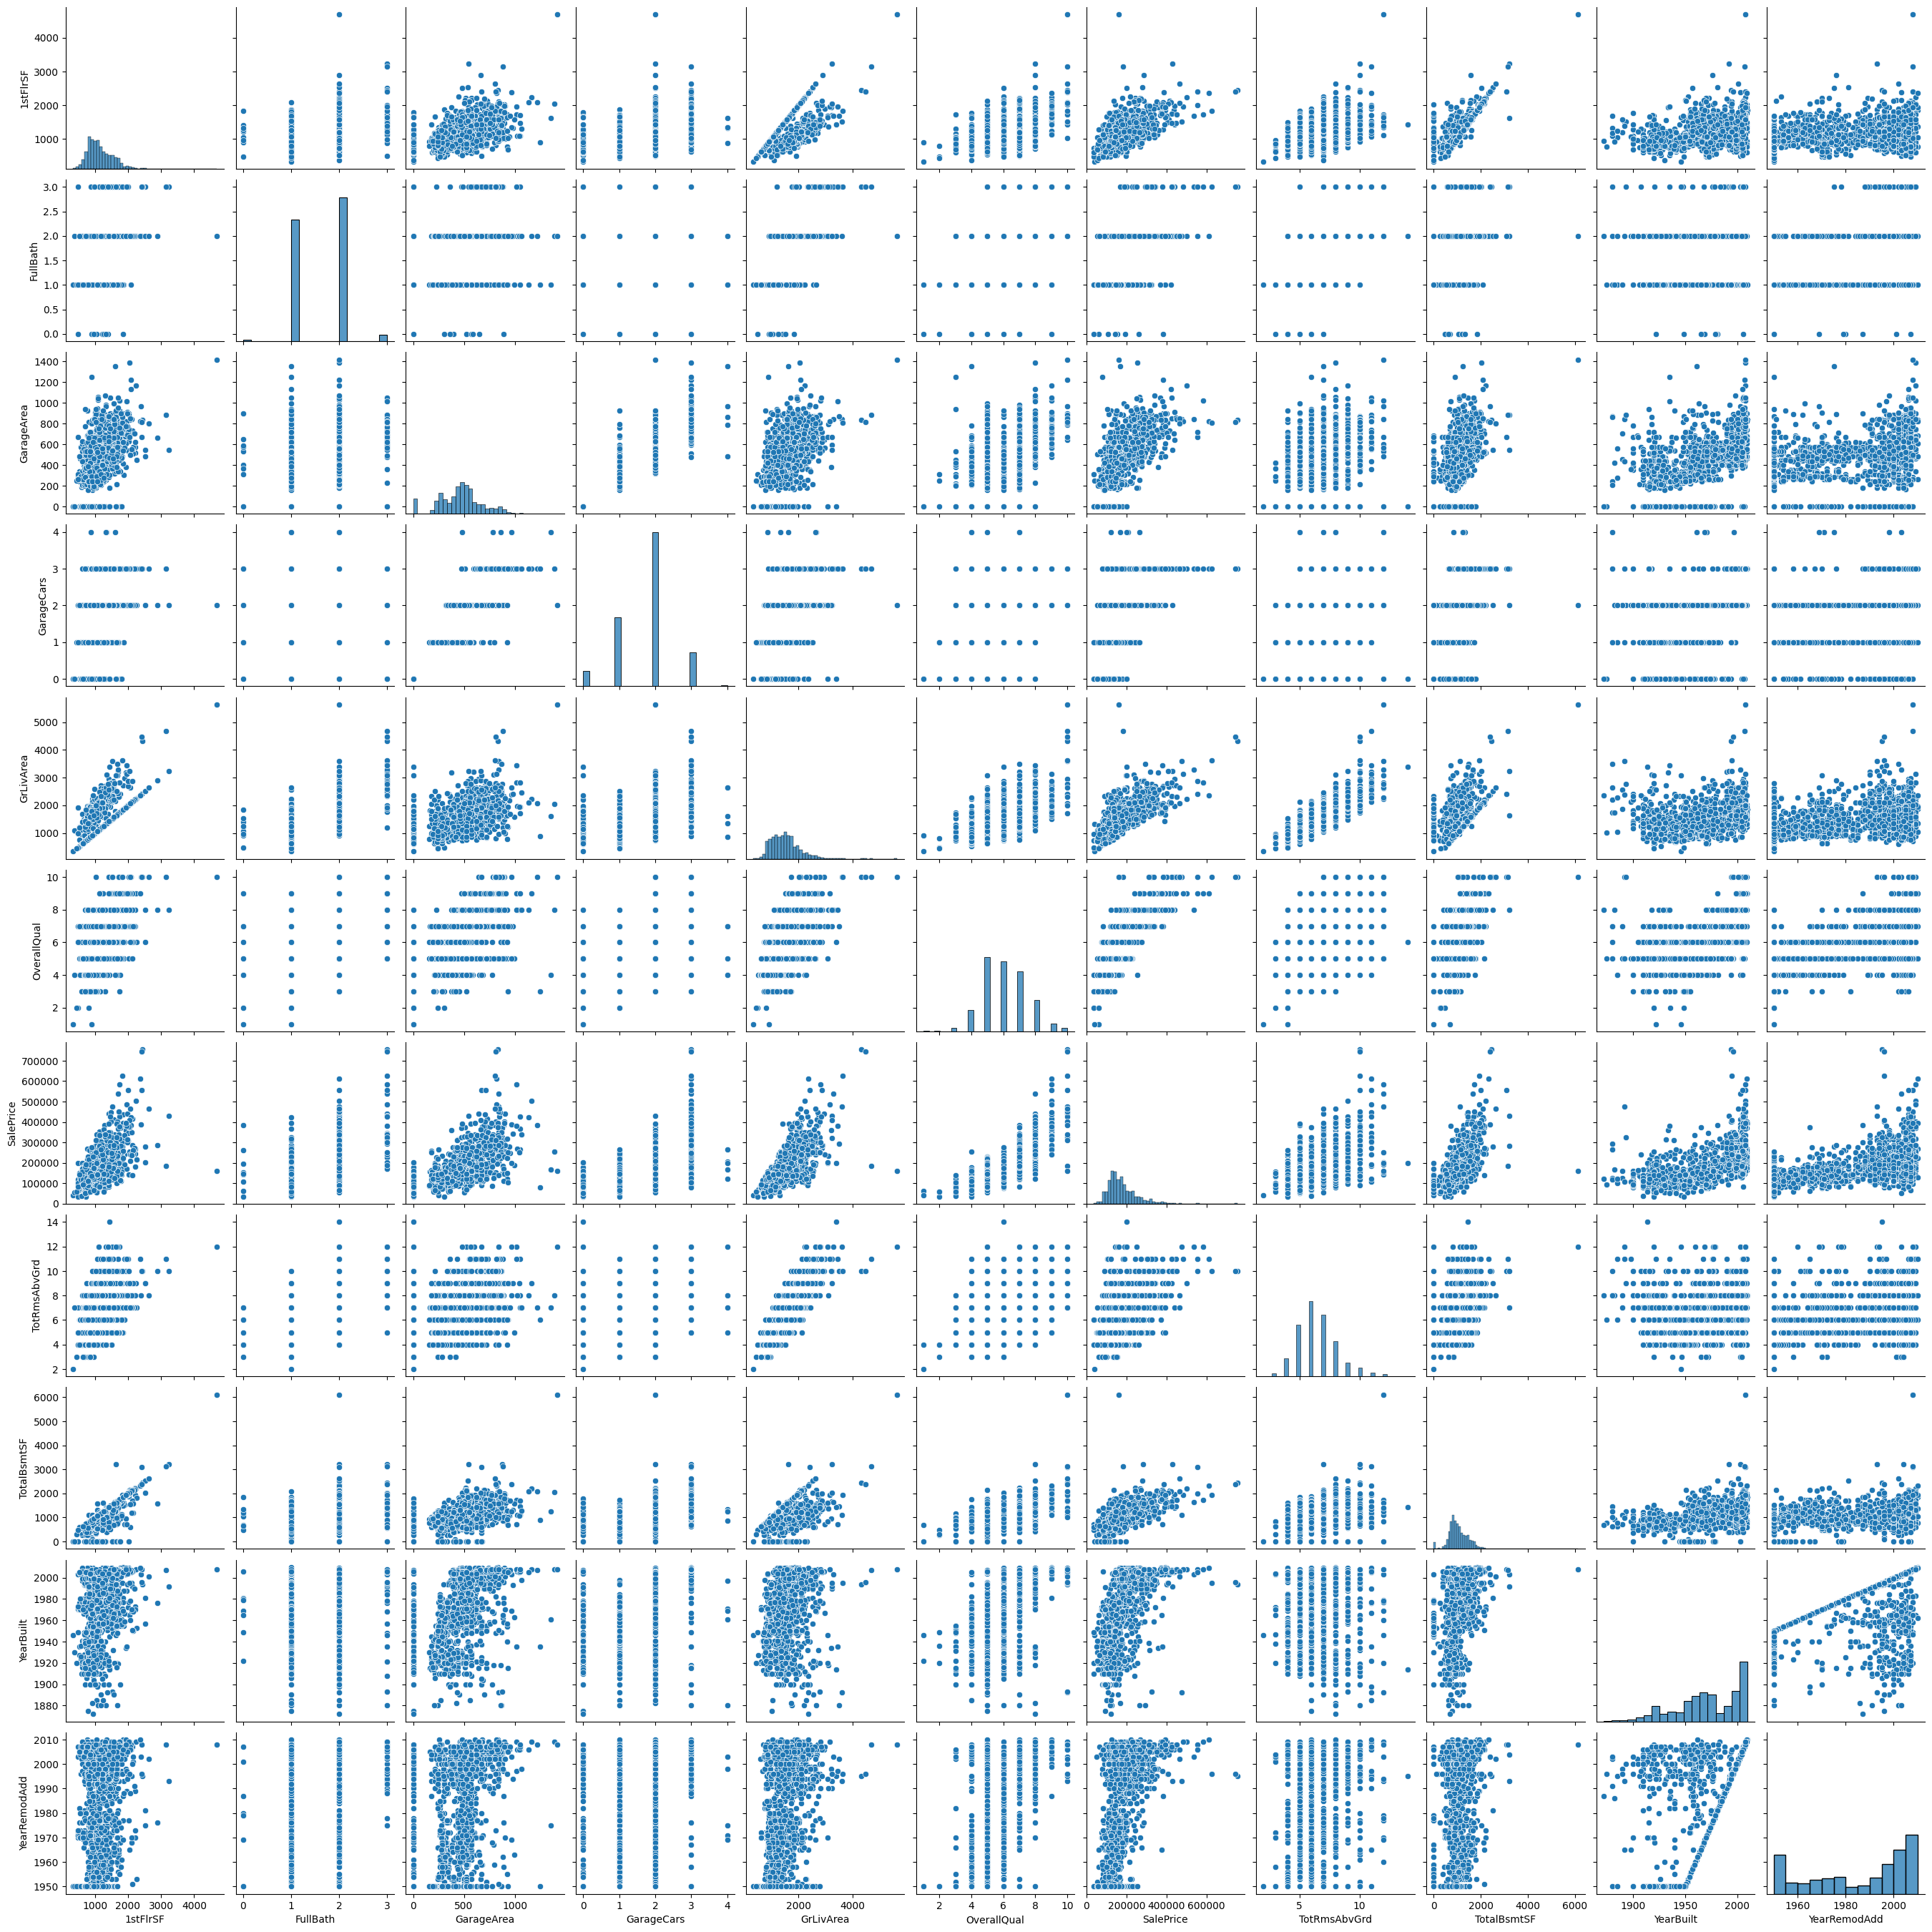

In [ ]:
#pariplot Í∑∏Î¶¨Í∏∞
top_corr=corr['SalePrice'].sort_values(ascending=False).head(10).index #SalePriceÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ 10Í∞úÏùò Î≥ÄÏàò ÏÑ†ÌÉù
top_corr=top_corr.union(['SalePrice']) # Í∑∏ÎûòÌîÑÏóêÏÑú SalePriceÎèÑ Í∞ôÏù¥ Î≥¥Ïó¨Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú Í∞ïÏ†úÎ°ú Ï∂îÍ∞Ä (union)

sns.pairplot(train[top_corr]);

# Data Processing and Cleaning

In [ ]:
print('Training Shape:', train.shape)
print('Test Shape:', test.shape)

Training Shape: (1460, 81)
Test Shape: (1459, 80)


In [ ]:
#  Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò iDÎäî Î≥ÑÎèÑ Ï†ÄÏû•
train_id = train['Id']
test_id = test['Id']
del train['Id']
del test['Id']

## Outliers

In [ ]:
train1 = train.copy()
train1 = train1.drop(train1[(train1['GarageArea']>1200) & (train1['SalePrice']<300000)].index)  #GarageAreaÍ∞Ä Îß§Ïö∞ ÎÑìÏùÄÎç∞ Í∞ÄÍ≤©Ïù¥ ÎÇÆÏùÄ Í≤ΩÏö∞ -> Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®
train1 = train1.drop(train1[(train1['GrLivArea']>4000) & (train1['SalePrice']<300000)].index)  #GrLivAreaÍ∞Ä Îß§Ïö∞ ÎÑìÏùÄÎç∞ Í∞ÄÍ≤©Ïù¥ ÎÇÆÏùÄ Í≤ΩÏö∞ -> Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®
train1 = train1.drop(train1[(train1['TotalBsmtSF']>5000)].index)    # ÏßÄÌïòÏã§ Î©¥Ï†ÅÏù¥ Í≥ºÌïòÍ≤å ÌÅ∞ Í≤ΩÏö∞ -> Í∞ÄÍ≤© Ï°∞Í±¥ ÏÉÅÍ¥ÄÏóÜÏù¥ Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®

In [ ]:
# Q1 = train['GarageArea'].quantile(0.25)
# Q3 = train['GarageArea'].quantile(0.75)
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR
# under_bound = Q1 - 1.5 * IQR

# print(upper_bound, under_bound)

# ## IQRÎñÑÎ†§Î≥∏ Í≤∞Í≥º, ÏúÑÏùò Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®ÌïòÎäî Í∏∞Ï§ÄÏùò Í∞íÍ≥º ÏùºÏπòÌïòÏßÄ ÏïäÏùå.
# ## ÎåÄÏ≤¥ Ïñ¥Îñ§ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌåêÎã®ÌïòÎäî Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ïÌïúÍ±∏Íπå??

938.25 -27.75


In [ ]:
print('Outliers removed =', train.shape[0] - train1.shape[0])

Outliers removed = 5


# XÏôÄ yÎ∂ÑÎ¶¨

In [ ]:
X=train1.drop('SalePrice', axis=1)
y=train1['SalePrice'].to_frame()

# Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌï¥ÏÑú ÎÇòÏ§ëÏóê Îã§Ïãú trainÍ≥º testÎ•º Î∂ÑÎ¶¨Ìï† Îïå Ïö©Ïù¥ÌïòÎèÑÎ°ù Ìï®.
# ex: df[df['train'] ==1 ] -> train
X['train'] = 1
test['train'] = 0

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÎ•º ÏâΩÍ≤å Ìï† Ïàò ÏûàÎèÑÎ°ù ÎëêÍ∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏÖã Ìï©ÏπòÍ∏∞
df=pd.concat([test,X])

‚úîÔ∏è concatÏùò Í∏∞Î≥∏Í∞íÏùÄ axis=0 Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ìñâ Î∞©Ìñ•ÏúºÎ°ú ÏúÑ ÏúÑÏïÑÎûòÎ•º Ïù¥Ïñ¥Î∂ôÏûÑ

In [ ]:
print('Count of Features per Data Type:')
df.dtypes.value_counts()

Count of Features per Data Type:


object     43
int64      26
float64    11
Name: count, dtype: int64

In [ ]:
# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))


# Do we have missing values?
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 15686


# Feature Engineering

In [ ]:
print('Missing Values per Column:')
df.isnull().sum().sort_values(ascending=False).head(25)
#MasVnrTyp(ÏÑùÏ°∞ Î≤†ÎãàÏñ¥ ÌÉÄÏûÖ??)Ïù¥ ÏõêÎ≥∏Í≥º Îã§Î•¥Í≤å ÎÇòÏò§Í≥† ÏûàÏùå (ÏõêÎ≥∏:24 -> 1765)

Missing Values per Column:


PoolQC          2905
MiscFeature     2810
Alley           2716
Fence           2343
MasVnrType      1765
FireplaceQu     1419
LotFrontage      485
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Functional         2
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 1

‚úîÔ∏è PoolQC (ÏàòÏòÅÏû• ÌíàÏßà)
    
 NaNÏùÄ ÏàòÏòÅÏû•Ïù¥ ÏóÜÎäî ÏßëÏùÑ ÏùòÎØ∏Ìï®
    
 ‚Üí "None" ÎòêÎäî "NoPool" Îì±ÏúºÎ°ú ÎåÄÏ≤¥ Í∞ÄÎä•

---

‚úîÔ∏èMiscFeature (Í∏∞ÌÉÄ Î∂ÄÍ∞Ä Í∏∞Îä•)

NaNÏùÄ Í∏∞ÌÉÄ Ìï≠Î™©Ïù¥ ÏóÜÎäî Í≤ΩÏö∞Î•º ÏùòÎØ∏Ìï®

‚Üí "None"ÏúºÎ°ú Ï≤òÎ¶¨

---

‚úîÔ∏è Alley (Í≥®Î™©Í∏∏ Ï†ëÍ∑º ÌòïÌÉú)

NaNÏùÄ Í≥®Î™©Í∏∏ Ï†ëÍ∑ºÏù¥ ÏóÜÎäî Í≤ΩÏö∞

‚Üí "None" ÎòêÎäî "NoAlleyAccess"

---

‚úîÔ∏èFence (Ïö∏ÌÉÄÎ¶¨ Ï¢ÖÎ•ò)

NaNÏùÄ Ïö∏ÌÉÄÎ¶¨Í∞Ä ÏóÜÎäî Í≤ΩÏö∞

‚Üí "None"ÏúºÎ°ú ÎåÄÏ≤¥

---

‚úîÔ∏èFireplaceQu (Î≤ΩÎÇúÎ°ú ÌíàÏßà)

NaNÏùÄ Î≤ΩÎÇúÎ°úÍ∞Ä ÏóÜÎäî ÏßëÏùÑ ÏùòÎØ∏Ìï®

‚Üí "None" Ï≤òÎ¶¨

---

‚úîÔ∏èLotFrontage(Í±∞Î¶¨ÏôÄ Ï£ºÌÉù ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨)
- Îã®ÏúÑ;ÌîºÌä∏(ft)
- Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Î∞©Î≤ï: Ìï¥Îãπ Ïù¥ÏõÉÍ≥ºÏùò Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    ‚Üê ÏßÄÏó≠Î≥Ñ ÌÜ†ÏßÄ Íµ¨Ï°∞Î•º Î∞òÏòÅÌïòÎäî Ìï©Î¶¨Ï†Å Î∞©Ïãù


In [ ]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda i:i.fillna(i.median())) #lambdaÌï®Ïàò ÏÇ¨Ïö©Î≤ïÏóê ÏùµÏàôÌï¥ÏßàÍ≤É!

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨2


---

‚úîÔ∏è Garage Í¥ÄÎ†® Î≥ÄÏàòÎì§(GarageÎ°ú ÏãúÏûë)

NaNÏùÄ Ìï¥Îãπ ÏßëÏóê Ï∞®Í≥†Í∞Ä ÏóÜÏùåÏùÑ ÏùòÎØ∏

GarageÎ°ú ÏãúÏûëÌïòÎäî Î≥ÄÏàòÎì§Îßå Ï∂îÏ∂úÌï¥ÏÑú ÏÇ¥Ìé¥Î≥¥Í∏∞

In [ ]:
# GarageÍ¥ÄÎ†® Î≥ÄÏàòÎì§ ÌÉêÏÉâ
garage_cols = [col for col in df if col.startswith('Garage')]
df[garage_cols]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0        Attchd       1961.0          Unf         1.0       730.0         TA   
1        Attchd       1958.0          Unf         1.0       312.0         TA   
2        Attchd       1997.0          Fin         2.0       482.0         TA   
3        Attchd       1998.0          Fin         2.0       470.0         TA   
4        Attchd       1992.0          RFn         2.0       506.0         TA   
...         ...          ...          ...         ...         ...        ...   
1455     Attchd       1999.0          RFn         2.0       460.0         TA   
1456     Attchd       1978.0          Unf         2.0       500.0         TA   
1457     Attchd       1941.0          RFn         1.0       252.0         TA   
1458     Attchd       1950.0          Unf         1.0       240.0         TA   
1459     Attchd       1965.0          Fin         1.0       276.0         TA   

     GarageCond  
0            TA  
1            TA  
2            TA  
3            TA  
4            TA  
...         ...  
1455         TA  
1456         TA  
1457         TA  
1458         TA  
1459         TA  

[2914 rows x 7 columns]

In [ ]:

df[garage_cols].isnull().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

‚úÖ garageÏôÄ Í¥ÄÎ†®Îêú Î≤îÏàòÎì§ÏùÄ Î≤îÏ£ºÌòïÍ≥º ÏàòÏπòÌòïÏù¥ ÏÑûÏó¨ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï®.

‚úîÔ∏ègarageÍ¥ÄÎ†® Î≥ÄÏàòÎì§:

1. Î≤îÏ£ºÌòï Î≥ÄÏàò

    NanÍ∞íÏùÄ 'ÏóÜÏùå'ÏùÑ ÏùòÎØ∏ÌïòÎäî 'None'Î¨∏ÏûêÏó¥Î°ú ÎåÄÏ≤¥

2. ÏàòÏπòÌòï Î≥ÄÏàò

    NaN Í∞íÏùÄ 0ÏúºÎ°ú ÎåÄÏ≤¥

    **Í∞úÏù∏Ï†ÅÏùòÎ¨∏: ÏúÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥, GarageYrBltÏùò Í≤∞Ï∏°ÏπòÎäî 0ÏúºÎ°ú Î∞îÍøÄÍ≤å ÏïÑÎãàÎùº ÎìúÎûçÌï¥ÏïºÌïòÎäîÍ±∞ ÏïÑÎãò??


In [ ]:
# Í∞úÏù∏Ï†Å ÏùòÎ¨∏Ïö© ÌôïÏù∏ ÏΩîÎìú
# garage_cols Ï§ëÏóêÏÑú ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
num_cols = df[garage_cols].select_dtypes(include='number').columns

# Í∑∏ Ï§ëÏóêÏÑú ÌïòÎÇòÎùºÎèÑ NaNÏù∏ Ìñâ Ï∂îÏ∂ú
df.loc[df[num_cols].isnull().any(axis=1), garage_cols]


GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
53          NaN          NaN          NaN         0.0         0.0        NaN   
71          NaN          NaN          NaN         0.0         0.0        NaN   
79          NaN          NaN          NaN         0.0         0.0        NaN   
92          NaN          NaN          NaN         0.0         0.0        NaN   
96          NaN          NaN          NaN         0.0         0.0        NaN   
...         ...          ...          ...         ...         ...        ...   
1349        NaN          NaN          NaN         0.0         0.0        NaN   
1407        NaN          NaN          NaN         0.0         0.0        NaN   
1449        NaN          NaN          NaN         0.0         0.0        NaN   
1450        NaN          NaN          NaN         0.0         0.0        NaN   
1453        NaN          NaN          NaN         0.0         0.0        NaN   

     GarageCond  
53          NaN  
71          NaN  
79          NaN  
92          NaN  
96          NaN  
...         ...  
1349        NaN  
1407        NaN  
1449        NaN  
1450        NaN  
1453        NaN  

[159 rows x 7 columns]

In [ ]:
for i in df[garage_cols].select_dtypes(exclude='object').columns: df[i] = df[i].fillna(0)
for i in df[garage_cols].select_dtypes(include='object').columns: df[i] = df[i].fillna('None')

In [ ]:
df[garage_cols].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 3
‚úîÔ∏èBsmtÎ°ú ÏãúÏûëÌïòÎäî ÌäπÏßïÎì§

NaNÏùÄ ÏßÄÌïòÏã§Ïù¥ ÏóÜÎäî ÏßëÏùÑ ÏùòÎØ∏
‚Üí "None" ÎòêÎäî 0ÏúºÎ°ú ÎåÄÏ≤¥ (ÌÉÄÏûÖÏóê Îî∞Îùº)

---

‚úîÔ∏è MasÎ°ú ÏãúÏûëÌïòÎäî ÌäπÏßïÎì§ (Masonry Veneer)

NaNÏùÄ Ïô∏Î≤Ω ÎßàÍ∞êÏù¥ Î≤ΩÎèå(ÏÑùÏû¨)Ïù¥ ÏïÑÎãå ÏßëÏùÑ ÏùòÎØ∏
‚Üí "None" ÎòêÎäî 0ÏúºÎ°ú ÎåÄÏ≤¥

---

‚úîÔ∏è MSZoning (Ïö©ÎèÑ Íµ¨Î∂Ñ)
MSZoningÏùÄ Îß§Îß§Îêú Î∂ÄÎèôÏÇ∞Ïùò ÏùºÎ∞ò Ïö©ÎèÑ Íµ¨Î∂Ñ(Zone)ÏùÑ ÎÇòÌÉÄÎÉÑ

Í≤∞Ï∏°Í∞íÏùÄ Ìï¥Îãπ ÏßÄÏó≠(Neighborhood)ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî Íµ¨Ïó≠ Ïú†Ìòï(ÏµúÎπàÍ∞í)ÏúºÎ°ú Ï±ÑÏõÄ

---

In [ ]:
#BsmtÍ≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
bsmt_cols = [col for col in df if col.startswith('Bsmt')]

for i in df[bsmt_cols].select_dtypes(exclude='object').columns: df[i] = df[i].fillna(0)
for i in df[bsmt_cols].select_dtypes(include='object').columns: df[i] = df[i].fillna('None')

#Mas Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
mas_cols = [col for col in df if col.startswith('Mas')]

for i in df[mas_cols].select_dtypes(exclude='object').columns: df[i] = df[i].fillna(0)
for i in df[mas_cols].select_dtypes(include='object').columns: df[i] = df[i].fillna('None')


#MSZoning Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda i: i.fillna(i.value_counts().index[0]))



In [ ]:
print('Missing Values left:')
df.isnull().sum().sort_values(ascending=False).head(10)

Missing Values left:


Utilities      2
Functional     2
SaleType       1
TotalBsmtSF    1
Exterior2nd    1
Electrical     1
Exterior1st    1
KitchenQual    1
LandContour    0
MSSubClass     0
dtype: int64

In [ ]:
# ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎì§ÏùÄ Í∑∏ÎÉ• ÏµúÎπàÍ∞íÏúºÎ°ú Ï†ÑÌôò
df=df.fillna(df.mode().iloc[0])

## Ïπ¥ÌÖåÍ≥†Î¶¨ÌòïÏúºÎ°ú Î∞îÍæ∏Í∏∞

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   int64  
 1   MSZoning       2914 non-null   object 
 2   LotFrontage    2914 non-null   float64
 3   LotArea        2914 non-null   int64  
 4   Street         2914 non-null   object 
 5   Alley          2914 non-null   object 
 6   LotShape       2914 non-null   object 
 7   LandContour    2914 non-null   object 
 8   Utilities      2914 non-null   object 
 9   LotConfig      2914 non-null   object 
 10  LandSlope      2914 non-null   object 
 11  Neighborhood   2914 non-null   object 
 12  Condition1     2914 non-null   object 
 13  Condition2     2914 non-null   object 
 14  BldgType       2914 non-null   object 
 15  HouseStyle     2914 non-null   object 
 16  OverallQual    2914 non-null   int64  
 17  OverallCond    2914 non-null   int64  
 18  YearBuilt    

In [ ]:
df.describe().T

count          mean          std     min      25%     50%  \
MSSubClass     2914.0     57.112217    42.474217    20.0    20.00    50.0   
LotFrontage    2914.0     69.406829    21.191130    21.0    60.00    70.0   
LotArea        2914.0  10128.200755  7798.584415  1300.0  7473.00  9450.0   
OverallQual    2914.0      6.087509     1.405287     1.0     5.00     6.0   
OverallCond    2914.0      5.566232     1.113182     1.0     5.00     5.0   
YearBuilt      2914.0   1971.291352    30.286886  1872.0  1953.25  1973.0   
YearRemodAdd   2914.0   1984.254633    20.887641  1950.0  1965.00  1993.0   
MasVnrArea     2914.0    100.879204   178.071569     0.0     0.00     0.0   
BsmtFinSF1     2914.0    438.919012   444.059991     0.0     0.00   368.0   
BsmtFinSF2     2914.0     49.650309   169.311762     0.0     0.00     0.0   
BsmtUnfSF      2914.0    560.042210   438.937719     0.0   220.00   467.0   
TotalBsmtSF    2914.0   1048.611531   429.273260     0.0   792.25   988.0   
1stFlrSF       2914.0   1157.320178   384.986979   334.0   876.00  1082.0   
2ndFlrSF       2914.0    336.207275   428.204291     0.0     0.00     0.0   
LowQualFinSF   2914.0      4.702471    46.436218     0.0     0.00     0.0   
GrLivArea      2914.0   1498.229925   496.930960   334.0  1126.00  1443.0   
BsmtFullBath   2914.0      0.428964     0.523985     0.0     0.00     0.0   
BsmtHalfBath   2914.0      0.061428     0.245805     0.0     0.00     0.0   
FullBath       2914.0      1.567605     0.552491     0.0     1.00     2.0   
HalfBath       2914.0      0.379890     0.502811     0.0     0.00     0.0   
BedroomAbvGr   2914.0      2.860329     0.823228     0.0     2.00     3.0   
KitchenAbvGr   2914.0      1.044612     0.214638     0.0     1.00     1.0   
TotRmsAbvGrd   2914.0      6.447495     1.564767     2.0     5.00     6.0   
Fireplaces     2914.0      0.596088     0.644924     0.0     0.00     1.0   
GarageYrBlt    2914.0   1870.144132   450.040352     0.0  1957.00  1977.0   
GarageCars     2914.0      1.763898     0.760680     0.0     1.00     2.0   
GarageArea     2914.0    471.363075   213.086144     0.0   320.00   479.0   
WoodDeckSF     2914.0     93.575154   126.412139     0.0     0.00     0.0   
OpenPorchSF    2914.0     47.291009    67.141235     0.0     0.00    26.0   
EnclosedPorch  2914.0     23.137955    64.292224     0.0     0.00     0.0   
3SsnPorch      2914.0      2.606726    25.209546     0.0     0.00     0.0   
ScreenPorch    2914.0     16.089911    56.228619     0.0     0.00     0.0   
PoolArea       2914.0      2.090940    34.579098     0.0     0.00     0.0   
MiscVal        2914.0     50.721002   567.807459     0.0     0.00     0.0   
MoSold         2914.0      6.213452     2.713410     1.0     4.00     6.0   
YrSold         2914.0   2007.792725     1.315727  2006.0  2007.00  2008.0   
train          2914.0      0.499314     0.500085     0.0     0.00     0.0   

                    75%       max  
MSSubClass        70.00     190.0  
LotFrontage       80.00     313.0  
LotArea        11546.25  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       162.75    1600.0  
BsmtFinSF1       732.75    4010.0  
BsmtFinSF2         0.00    1526.0  
BsmtUnfSF        802.75    2336.0  
TotalBsmtSF     1301.50    5095.0  
1stFlrSF        1383.75    5095.0  
2ndFlrSF         704.00    2065.0  
LowQualFinSF       0.00    1064.0  
GrLivArea       1743.00    5095.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       4.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      15.0  
Fireplaces         1.00       4.0  
GarageYrBlt     2001.00    2207.0  
GarageCars         2.00       5.0  
GarageArea       576.00    1488.0  
WoodDeckSF       168.00    1424.0  
OpenPorchSF       70.00     742.0  
EnclosedP

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str) #Ïõî Î≥ÄÏàòÎäî Ìï≠ÏÉÅ Ïπ¥ÌÖåÍ≥†Î¶¨ üå±
df['YrSold'] = df['YrSold'].astype(str) #5ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞Î∞ñÏóê ÏóÜÏùå

## Í¥ÄÎ†® Î≥ÄÏàò ÎßåÎì§Í∏∞

In [ ]:
df['Total_House_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] #Ï¥ù Î©¥Ï†Å
df['Total_Home_Quality'] = (df['OverallQual'] + df['OverallCond']) / 2 #Ï¥ù ÌÄÑÎ¶¨Ìã∞ ÌèâÍ∑†
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

| ÏöïÏã§ Ï¢ÖÎ•ò         | Íµ¨ÏÑ±                              | ÏùòÎØ∏               | Í∞ÄÏ§ëÏπò |
|------------------|-----------------------------------|--------------------|--------|
| **FullBath**     | ÏÉ§Ïõå/ÏöïÏ°∞ + ÏÑ∏Î©¥ÎåÄ + Î≥ÄÍ∏∞         | **ÏôÑÏ†ÑÌïú ÏöïÏã§**    | 1.0    |
| **HalfBath**     | ÏÑ∏Î©¥ÎåÄ + Î≥ÄÍ∏∞ (ÏÉ§Ïõå/ÏöïÏ°∞ ÏóÜÏùå)     | **Ï†àÎ∞òÏßúÎ¶¨ ÏöïÏã§**  | 0.5    |
| **BsmtFullBath** | ÏßÄÌïòÏóê ÏûàÎäî FullBath              | ÏôÑÏ†ÑÌïú ÏöïÏã§        | 1.0    |
| **BsmtHalfBath** | ÏßÄÌïòÏóê ÏûàÎäî HalfBath              | Ï†àÎ∞ò ÏöïÏã§          | 0.5    |


0.5Î•º Í≥±ÌïòÎäî Ïù¥Ïú†Îäî Î≠òÍπå??

‚û°Ô∏èÏöïÏã§Ïùò "Í∏∞Ïó¨ÎèÑ" ÎòêÎäî "Ï§ëÏöîÎèÑ"Î•º Î∞òÏòÅÌï¥ÏÑú
Ïã§Ï†ú ÏßëÏùò Í∞ÄÏπòÎÇò Î©¥Ï†Å Í∏∞Ïó¨Ïóê ÎßûÏ∂∞ Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú

ÏöïÏã§Ïùò Í∞ÄÏ§ë Ìï©Í≥Ñ = ÏÇ¨Ïö©Í∞ÄÏπòÎ•º ÌëúÌòÑÌïòÍ∏∞ ÏúÑÌï®!

# ÏôúÎèÑ Ï≤òÎ¶¨

ÌäπÌûà, ÎπÑÏ†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÏàòÏπòÌòï Î≥ÄÏàòÎì§ÏùÄ Î™®Îç∏ ÏÑ±Îä•Ïóê ÏïÖÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùå.

In [ ]:
numeric_cols = df.select_dtypes(exclude='object').columns

skew_limit = 0.5
skew_vals = df[numeric_cols].skew()   # Í∞Å ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò ÏôúÎèÑ Í≥ÑÏÇ∞

#ÏôúÎèÑÍ∞íÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÌôî + ÌïÑÌÑ∞ÎßÅ
skew_cols = (skew_vals
             .sort_values(ascending=False) #ÏôúÎèÑÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
             .to_frame()    #series ‚Üí DataFrame
             .rename(columns={0:'Skew'}) #Ïª¨ÎüºÎ™Ö SkewÎ°ú ÏÑ§Ï†ï
             .query('abs(Skew) > {0}'.format(skew_limit)))  #ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÌÅ∞ Í∞íÎßå Ï∂îÏ∂ú

skew_cols

Skew
MiscVal             21.949442
PoolArea            17.688586
LotArea             13.168399
LowQualFinSF        12.084424
3SsnPorch           11.371955
KitchenAbvGr         4.300206
BsmtFinSF2           4.144176
EnclosedPorch        4.002083
ScreenPorch          3.944742
BsmtHalfBath         3.929621
MasVnrArea           2.624455
OpenPorchSF          2.530314
WoodDeckSF           1.847494
1stFlrSF             1.260200
LotFrontage          1.105971
GrLivArea            1.070551
Total_House_SF       1.010874
BsmtFinSF1           0.981793
BsmtUnfSF            0.916129
2ndFlrSF             0.860449
TotRmsAbvGrd         0.750440
Fireplaces           0.726331
HalfBath             0.696987
TotalBsmtSF          0.671945
BsmtFullBath         0.622594
OverallCond          0.569084
Total_Home_Quality  -0.565021
YearBuilt           -0.600470
GarageYrBlt         -3.904268

`.query(...)`: pandas.DataFrameÏóêÏÑú Î¨∏ÏûêÏó¥ÏùÑ Ïù¥Ïö©Ìï¥ SQLÏ≤òÎüº Ï°∞Í±¥ÏùÑ Í±∏ Ïàò ÏûàÎäî Ìï®Ïàò

- abs(Skew): SkewÏùò Ï†àÎåìÍ∞í Í≥ÑÏÇ∞
- '> {0} : Î¨∏ÏûêÏó¥ Ìè¨Îß§ÌåÖ
- Î∞îÎ°ú >skew_limitÏúºÎ°ú Ïì∏ Ïàò ÏóÜÎäî Ïù¥Ïú†Îäî skew_limitÏùÑ Ïª¨ÎüºÎ™ÖÏúºÎ°ú Ïò§Ìï¥Ìï¥ÏÑú ÏóêÎü¨Í∞Ä ÎÇ† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏

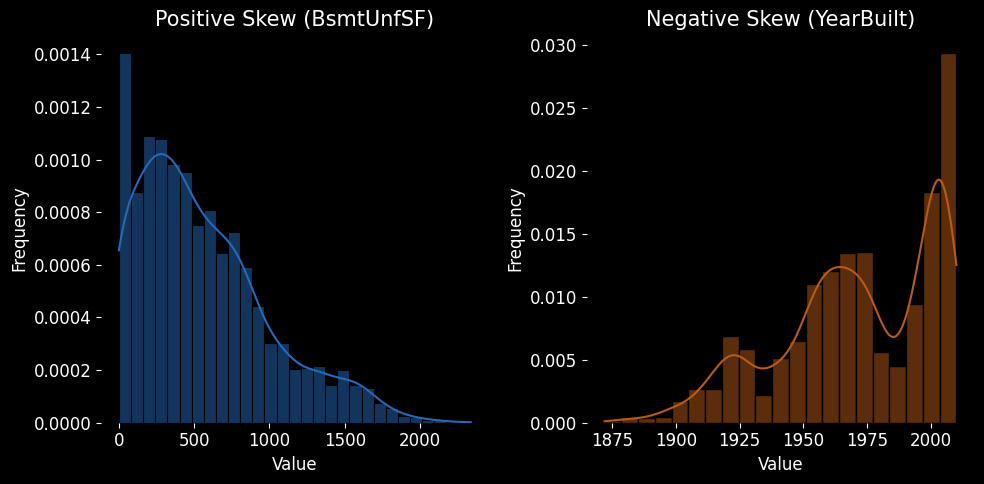

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ÏÑ§Ï†ï: Ìè∞Ìä∏ Î∞è ÌÖåÎßà Ïä§ÌÉÄÏùº
mpl.rcParams['font.family'] = 'DejaVu Sans'  # ÎåÄÏ≤¥ Í∞ÄÎä• Ìè∞Ìä∏
mpl.rcParams['font.size'] = 12

# ÎèÑÌôîÏßÄ Ï§ÄÎπÑ
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes

# Îã§ÌÅ¨ Î∞∞Í≤Ω ÏÑ§Ï†ï
fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞ (Seaborn)
sns.histplot(data=df, x='BsmtUnfSF', kde=True, stat='density', color='#236AB9', ax=ax1)
sns.histplot(data=df, x='YearBuilt', kde=True, stat='density', color='#B85B14', ax=ax2)

# Ï∂ï/ÎùºÎ≤® ÏÉâÏÉÅ Î∞è ÏÑ§Ï†ï ÌÜµÏùº
for ax, title in zip([ax1, ax2], ['Positive Skew (BsmtUnfSF)', 'Negative Skew (YearBuilt)']):
    ax.set_xlabel('Value', color='white')
    ax.set_ylabel('Frequency', color='white')
    ax.set_title(title, fontsize=15, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Ï∂ï ÌÖåÎëêÎ¶¨ Ï†úÍ±∞
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
#Î∞ïÏä§ÏΩïÏä§ Î≥ÄÌôò
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1317: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

#### Box-CoxÎ≥ÄÌôòÏù¥ÎûÄ?

Ï†ïÍ∑úÌôî Î∞©Î≤ï
- ÏñëÏàòÎßå ÏûÖÎ†• Í∞ÄÎä• >> Î≥¥ÌÜµ Ï†ÅÏö© Ï†ÑÏóê 1ÏùÑ ÎçîÌïòÍ±∞ÎÇò, Î°úÍ∑∏Îì±Ïùò Î∞©Î≤ïÏùÑ ÏîÄ

- Ï¢Ö Î™®ÏñëÏùò Ï†ïÍ∑úÎ∂ÑÌè¨ Î™®ÏñëÏúºÎ°ú Î≥ÄÌôòÎê®

- Îã§ÏñëÌïú Í≥°ÏÑ† ÌòïÌÉúÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÎäîÎç∞, ÎûåÎã§ Í∞íÏúºÎ°ú Í≥°ÏÑ†Ïùò Î™®ÏñëÏùÑ Í≤∞Ï†ïÌï®.

‚û°Ô∏è`scipy.stats.boxcox_normmax()`Ìï®Ïàò: Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê Í∞ÄÏû• Ï†ÅÌï©Ìïú ÎûåÎã§Í∞íÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏûêÎèô Í≥ÑÏÇ∞
    
    - Œª=0.5: Ï†úÍ≥±Í∑º ‚Üí Ïò§Î•∏Ï™Ω Íº¨Î¶¨ Ï§ÑÏù¥Í∏∞ Ï¢ãÏùå

    - Œª=0: Î°úÍ∑∏ ‚Üí Î∂ÑÌè¨Î•º ÏïïÏ∂ïÌï¥ÏÑú Îçî Ï†ïÍ∑úÎ∂ÑÌè¨Ï≤òÎüº Î≥¥Ïù¥Í≤å Ìï®

    - Œª>1: ÏôºÏ™Ω Íº¨Î¶¨Í∞Ä ÏÉùÍ∏∏ ÏàòÎèÑ ÏûàÏùå (Ï°∞Ïã¨Ìï¥Ïïº Ìï®)

In [ ]:
# from scipy.special import boxcox1p
# from scipy.stats import boxcox_normmax

# for col in skew_cols.index:
#     # ÏòàÏô∏ ÏÉÅÌô© Î∞©ÏßÄÏö© ÌïÑÌÑ∞ÎßÅ
#     if (df[col] > 0).all() and df[col].nunique() > 1:
#         try:
#             fitted_lambda = boxcox_normmax(df[col] + 1)
#             df[col] = boxcox1p(df[col], fitted_lambda)
#         except Exception as e:
#             print(f"‚ö†Ô∏è Box-Cox Î≥ÄÌôò Ïã§Ìå®: {col} ‚Üí {e}")
#     else:
#         print(f"‚õî Skipped: {col} (ÏùåÏàò ÎòêÎäî Ïú†ÏùºÍ∞í)")

# Í∏∞Ï°¥ ÏΩîÎìú ÏóêÎü¨ Î∞úÏÉù

# ÏÉàÎ°úÏö¥ Ïä§ÏºÄÏùºÎßÅ ÏΩîÎìú: Box-Cox Ïã§Ìå® Ïãú log1pÎ°ú ÎåÄÏ≤¥
for col in skew_cols.index:
    col_data = df[col]

    # ÏùåÏàò ÎòêÎäî Ïú†ÏùºÍ∞í Ï†úÏô∏
    if (col_data > 0).all() and col_data.nunique() > 1:
        try:
            # Box-Cox Ï†ÅÏö©
            fitted_lambda = boxcox_normmax(col_data + 1)
            df[col] = boxcox1p(col_data, fitted_lambda)
        except Exception:
            # Ïã§Ìå® Ïãú log1pÎ°ú ÎåÄÏ≤¥
            df[col] = np.log1p(col_data)
    else:
        # log1pÎäî 0 Ìè¨Ìï®Ìï¥ÎèÑ ÏïàÏ†Ñ ‚Üí ÎåÄÏã† ÏùåÏàòÎßå ÏûàÎäî Í≤ΩÏö∞Îäî Ïó¨Ï†ÑÌûà Ï†úÏô∏
        if (col_data >= 0).all() and col_data.nunique() > 1:
            df[col] = np.log1p(col_data)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1317: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:1317: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)


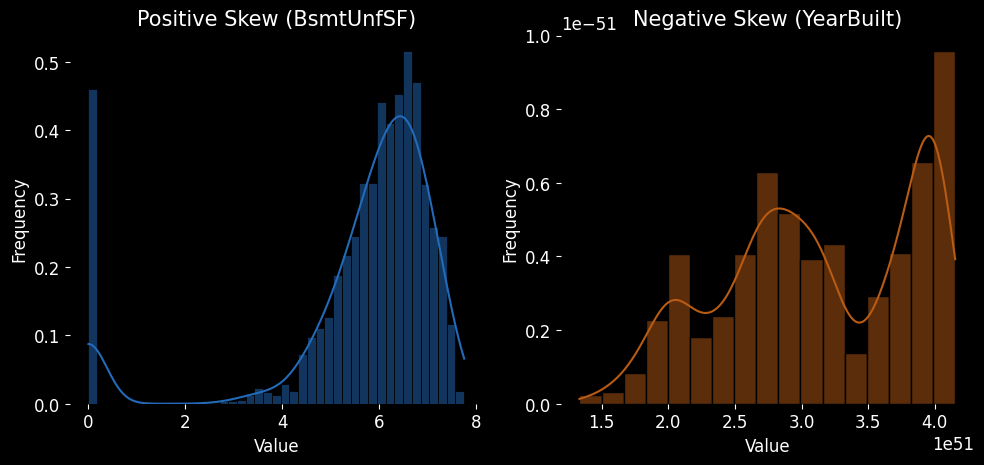

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ÏÑ§Ï†ï: Ìè∞Ìä∏ Î∞è ÌÖåÎßà Ïä§ÌÉÄÏùº
mpl.rcParams['font.family'] = 'DejaVu Sans'  # ÎåÄÏ≤¥ Í∞ÄÎä• Ìè∞Ìä∏
mpl.rcParams['font.size'] = 12

# ÎèÑÌôîÏßÄ Ï§ÄÎπÑ
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes

# Îã§ÌÅ¨ Î∞∞Í≤Ω ÏÑ§Ï†ï
fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞ (Seaborn)
sns.histplot(data=df, x='BsmtUnfSF', kde=True, stat='density', color='#236AB9', ax=ax1)
sns.histplot(data=df, x='YearBuilt', kde=True, stat='density', color='#B85B14', ax=ax2)

# Ï∂ï/ÎùºÎ≤® ÏÉâÏÉÅ Î∞è ÏÑ§Ï†ï ÌÜµÏùº
for ax, title in zip([ax1, ax2], ['Positive Skew (BsmtUnfSF)', 'Negative Skew (YearBuilt)']):
    ax.set_xlabel('Value', color='white')
    ax.set_ylabel('Frequency', color='white')
    ax.set_title(title, fontsize=15, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Ï∂ï ÌÖåÎëêÎ¶¨ Ï†úÍ±∞
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


## Transforming target

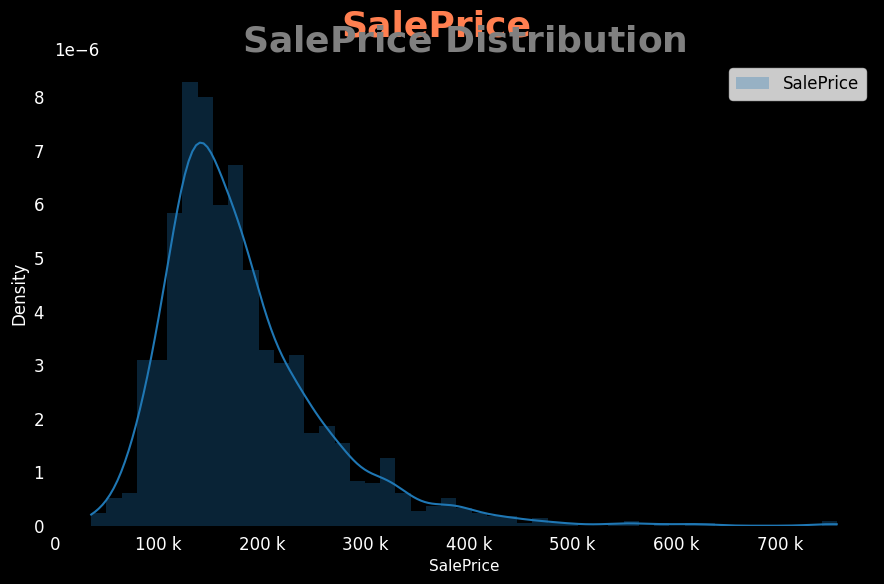

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(9, 6))
ax = sns.histplot(y, stat='density', linewidth=0, color='#ff7f50', kde=True, alpha=0.3)

# Îã§ÌÅ¨ Î∞∞Í≤Ω
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Ï∂ï Ïä§ÌÉÄÏùº
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='x', colors='white', bottom=False)
ax.tick_params(axis='y', colors='white', left=False)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Îã®ÏúÑ Ìè¨Îß∑
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('SalePrice', fontsize=11, color='white')
plt.ylabel('Density', color='white')

# üüß ÏõêÎ≥∏Ï≤òÎüº SalePrice Distribution ÌÖçÏä§Ìä∏ Ìïú Ï§ÑÎ°ú
plt.title("SalePrice Distribution", fontsize=26, loc='center', weight='bold')
# Í∞ïÏ°∞ ÏÉâÏÉÅ Ï†ÅÏö©
title = ax.title
title_text = title.get_text().replace("SalePrice", r"$\bf{SalePrice}$")
title.set_text(title_text)
title.set_color("grey")  # Í∏∞Î≥∏ Ï†ÑÏ≤¥ ÏÉâ
title.set_fontsize(26)

# Í∞ïÏ°∞ Î∂ÄÎ∂Ñ ÏÉâ Î≥ÄÍ≤Ω
ax.annotate("SalePrice", xy=(0.35, 1.05), xycoords='axes fraction',
            fontsize=26, color='#ff7f50', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# ÏôúÎèÑ Ï≤òÎ¶¨ (Î°úÍ∑∏ Î≥ÄÌôò)
y['SalePrice']=np.log1p(y["SalePrice"])

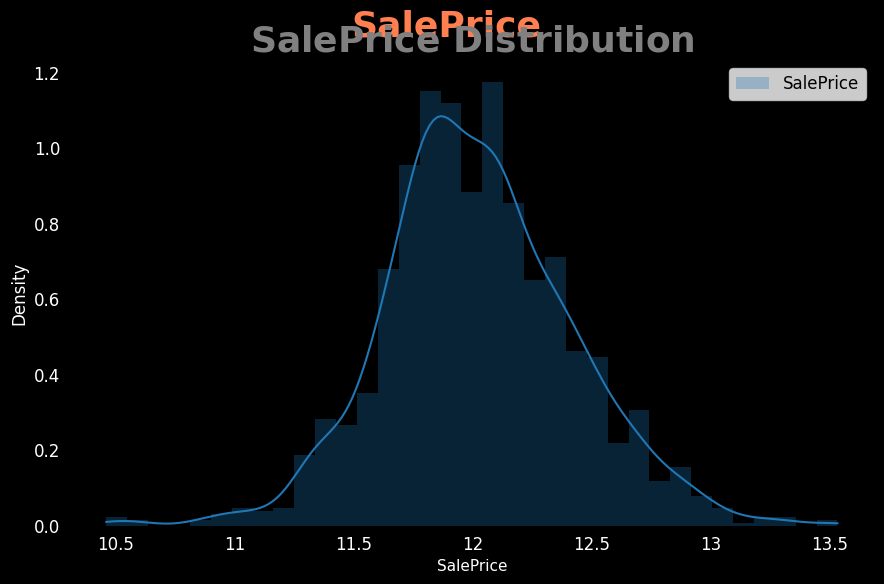

In [ ]:
#ÏôúÎèÑ Ï≤òÎ¶¨ ÌõÑÏùò SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(9, 6))
ax = sns.histplot(y, stat='density', linewidth=0, color='#ff7f50', kde=True, alpha=0.3)

# Îã§ÌÅ¨ Î∞∞Í≤Ω
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Ï∂ï Ïä§ÌÉÄÏùº
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='x', colors='white', bottom=False)
ax.tick_params(axis='y', colors='white', left=False)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Îã®ÏúÑ Ìè¨Îß∑
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('SalePrice', fontsize=11, color='white')
plt.ylabel('Density', color='white')

# üüß ÏõêÎ≥∏Ï≤òÎüº SalePrice Distribution ÌÖçÏä§Ìä∏ Ìïú Ï§ÑÎ°ú
plt.title("SalePrice Distribution", fontsize=26, loc='center', weight='bold')
# Í∞ïÏ°∞ ÏÉâÏÉÅ Ï†ÅÏö©
title = ax.title
title_text = title.get_text().replace("SalePrice", r"$\bf{SalePrice}$")
title.set_text(title_text)
title.set_color("grey")  # Í∏∞Î≥∏ Ï†ÑÏ≤¥ ÏÉâ
title.set_fontsize(26)

# Í∞ïÏ°∞ Î∂ÄÎ∂Ñ ÏÉâ Î≥ÄÍ≤Ω
ax.annotate("SalePrice", xy=(0.35, 1.05), xycoords='axes fraction',
            fontsize=26, color='#ff7f50', fontweight='bold')

plt.tight_layout()
plt.show()


## Encoding Categorical Features

In [ ]:
cat_cols = df.dtypes[df.dtypes == object]
cat_cols = cat_cols.index.tolist()

#ÏõêÌï´Ïù∏ÏΩîÎî©
df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
X = df_enc[df_enc['train']==1]
test=df_enc[df_enc['train']==0]
X.drop(['train'], axis=1, inplace=True)     #Í∏∞Ï§ÄÏùò trainÍ≥º testÏÖãÏúºÎ°ú ÎÇòÎàÑÎäî Í≥º
test.drop(['train'], axis=1, inplace=True)

<ipython-input-89-151b02b8f6f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['train'], axis=1, inplace=True)
<ipython-input-89-151b02b8f6f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['train'], axis=1, inplace=True)


# Î™®Îç∏ÎßÅ

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=12345)

In [ ]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

**RMSEÎûÄ?**

: ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®

(ÏòàÏ∏°Í∞í - Ïã§Ï†úÍ∞í)Ïùò Ï†úÍ≥± ÌèâÍ∑†Ïùò Ï†úÍ≥±Í∑º..

ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå.

ÌÅ∞ Ïò§Ï∞®Ïóê ÎØºÍ∞êÌïòÍ≤å Î∞òÏùëÌïúÎã§.(Ïò§Ï∞®Î•º Ï†úÍ≥±ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê!)

## Lasso Regression + Cross-Validation

ÎπÑÏö©Ìï®ÏàòÎ•º ÏµúÏÜåÌôîÌïòÎäî ÏÑ†Ìòï Î™®Îç∏

Ïù¥ ÎπÑÏö©Ìï®ÏàòÏóêÎäî Ìå®ÎÑêÌã∞Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ÏûàÎäîÎç∞, L1 Ìå®ÎÑêÌã∞ÎùºÍ≥† Î∂àÎ¶¨Î©∞, alphaÍ∞íÏù¥ Ïù¥ Ìå®ÎÑêÌã∞Ïùò Í∞ïÎèÑÎ•º Ï°∞Ï†àÌïúÎã§.

(Ï¶â, Lasso = ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ + L1)

Ïù¥ Ìå®ÎÑêÌã∞Îäî ÏùºÎ∂Ä Î≥ÄÏàòÏùò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú Í∞êÏÜåÏãúÌÇ§Îäî Ïó≠Ìï†

‚û°Ô∏è Î™®Îç∏Ïù¥ Îçî Í∞ÑÍ≤∞Ìï¥ÏßÄÍ≥† Ìï¥ÏÑùÌïòÍ∏∞ Ïâ¨ÏõåÏßê


‚úîÔ∏è alphaÍ∞íÏù¥ ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Í≥ÑÏàòÍ∞Ä 0Ïù¥ ÎêòÎèÑÎ°ù Ìï®

‚úîÔ∏è Î¨¥ÏùòÎØ∏Ìïú Î≥ÄÏàòÎì§ÏùÄ 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏó¨Ï£ºÍ≥†, Ïú†ÏùòÎØ∏Ìïú ÌäπÏßïÎßå ÎÇ®Í∏∞Îäî ÌäπÏßï ÏÑ†ÌÉù Í∏∞Îä•ÎèÑ Ìï®Íªò ÏàòÌñâ

In [ ]:
lasso = Lasso(max_iter = 100000)

# ÏµúÏ†ÅÏùò alphaÍ∞í Ï∞æÍ∏∞
lassocv = LassoCV(alphas=None, cv=10, max_iter = 100000)    # Ïó¨Îü¨Í∞úÏùò alphaÍ∞íÏùÑ ÏãúÎèÑÌï¥Î≥¥Í≥†, Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥Îäî alphaÎ•º Ï∞æÎäî Í≥ºÏ†ï
lassocv.fit(X_train, y_train)

#Î™®Îç∏ ÌïôÏäµ
lasso.set_params(alpha=lassocv.alpha_)  #lassocv.alpha_ : ÏµúÏ†ÅÏùò alphaÍ∞í // "LassoÏïº lassocvÍ∞Ä Í≥®ÎùºÏ§Ä ÏµúÍ≥†Ïùò alphaÍ∞íÏúºÎ°ú ÌïôÏäµÌï¥Îùº!"
lasso.fit(X_train, y_train)

print('The Lasso I:')
print('Alpha =', lassocv.alpha_)
print('RMSE =', rmse(y_test, lasso.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Lasso I:
Alpha = 5.722604371681073e+47
RMSE = 0.3085600149859336


In [ ]:
alpha = np.geomspace(1e-5, 1e0, num=6)
lasso_cv_model = LassoCV(alphas = alpha, cv = 10, max_iter = 100000).fit(X_train,y_train)
lasso_tuned = Lasso(max_iter = 100000).set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)
print('The Lasso II:')
print("Alpha =", lasso_cv_model.alpha_)
print("RMSE =", rmse(y_test, lasso_tuned.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Lasso II:
Alpha = 0.001
RMSE = 0.12325755143705641


The Lasso I : sklearnÏù¥ ÏïåÏïÑÏÑú alpha ÌõÑÎ≥¥Í∞í ÏàòÏã≠Í∞úÎ•º ÏÉùÏÑ±

- ÎÇ¥Î∂Ä ÏûëÎèôÏùÑ Î≥º Ïàò ÏóÜÏùå

The Lasso 2: ÎÇ¥Í∞Ä alphaÌõÑÎ≥¥Í∞í 6Í∞ú Ï†ïÌïú Í≤É Ï§ëÏóêÏÑú ÏµúÍ≥†Ïùò alphaÍ∞í ÏÑ†Ï†ï

- Ï†ïÌôïÌûà Ïñ¥Îñ§ Í∞íÏùÑ ÌÖåÏä§Ìä∏ ÌñàÎäîÏßÄ, alphaÎ≥Ñ ÏÑ±Îä• Î≥ÄÌôî ÏãúÍ∞ÅÌôî Í∞ÄÎä•

## Ridge Regressoin + Cross-Validation

ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ + L2 Ìå®ÎÑêÌã∞

- alphaÍ∞íÏù¥ ÏûëÏùÑÏàòÎ°ù, Îçî ÏÑ†ÌòïÏ†ÅÏù∏ ÌòïÌÉúÎ•º ÎùàÎã§(Îã®ÏàúÌôîÎê®)
- ridgeÌöåÍ∑ÄÎäî Í≥ÑÏàòÎ•º Ï∂ïÏÜåÏãúÏºú Î≥µÏû°ÎèÑÏôÄ, Îã§Ï§ë Í≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º Ï§ÑÏù¥ÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï§å

In [ ]:
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum())

0
SalePrice    0
dtype: int64


In [ ]:
print(np.isinf(X_train).sum().sum())
print(np.isinf(y_train).sum())

0
SalePrice    0
dtype: int64


In [ ]:
print(X_train.max().max())
# Ïñò Í∞íÏù¥ ÎÑàÎ¨¥ Ïª§ÏÑú Ïò§Î•òÍ∞Ä ÎÇòÎäî ÎìØ

4.153288531579904e+51


In [ ]:
X_train.max().sort_values(ascending=False).head(10)

YearBuilt             4153288531579904078009415829371635937628432526...
YearRemodAdd                                                       2010
GarageArea                                                       1220.0
Total_House_SF                                                50.014822
Total_Home_Quality                                             41.84953
LotFrontage                                                   34.350886
LotArea                                                       12.279537
OverallQual                                                          10
GrLivArea                                                      9.550032
1stFlrSF                                                       8.079928
dtype: object

In [ ]:
X_train.loc[X_train['YearBuilt'] > 2010, 'YearBuilt'] = 2010
X_test.loc[X_test['YearBuilt'] > 2010, 'YearBuilt'] = 2010

In [ ]:
X_train.max().sort_values(ascending=False).head(10)

YearRemodAdd               2010
YearBuilt                2010.0
GarageArea               1220.0
Total_House_SF        50.014822
Total_Home_Quality     41.84953
LotFrontage           34.350886
LotArea               12.279537
OverallQual                  10
GrLivArea              9.550032
1stFlrSF               8.079928
dtype: object

In [ ]:
alphas = np.geomspace(1e-9, 5, num=100)

ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)

ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)

print('Ridge Regression:')
print('Alpha =', ridgecv.alpha_)
print('RMSE =', rmse(y_test, ridge.predict(X_test)))


Ridge Regression:
Alpha = 5.0
RMSE = 0.12232298277149004


## Support Vector Regression (SVR) + Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVR

kf=KFold(shuffle=True, random_state=1234, n_splits=10)

X_train_scale=RobustScaler().fit_transform(X_train)
X_test_scale=RobustScaler().fit_transform(X_test)

parameters={'C':[20,30,40], 'gamma': [1e-4, 3e-4, 5e-4],'epsilon':[0.1, 0.01, 0.05]}
svr=SVR(kernel='rbf')
clf=GridSearchCV(svr, parameters, cv=kf)
clf.fit(X_train_scale, y_train)
clf.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'C': 30, 'epsilon': 0.01, 'gamma': 0.0003}

___
‚úÖSVRÏù¥ÎûÄ?(Support Vector Regression)

Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïò§Ï∞®Í∞Ä nÏù¥ÌïòÏù∏ ÏóêÏ∏°ÏùÑ ÏµúÎåÄÌïò ÎßéÏù¥ ÎßåÎìúÎ†§Í≥† ÎÖ∏Î†•ÌïòÎäî ÌöåÍ∑Ä ÏïåÍ≥†Î¶¨Ï¶ò

- C: ÌóàÏö©Ìï† Ïò§Ï∞® Î≤îÏúÑ
    - ÏûëÏùÑÏàòÎ°ù ÏùºÎ∞òÌôî (Ïñ∏ÎçîÌîºÌåÖ Í∞ÄÎä•)
    - ÌÅ¥ÏàòÎ°ù Ïò§Ï∞®Î•º ÎßéÏù¥ ÌóàÏö©ÌïòÏßÄ ÏïäÏïÑ Î≥µÏû°Ìïú Í∑∏ÎûòÌîÑÍ∞Ä Í∑∏Î†§Ïßê (Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±)

- Ïª§ÎÑê: ÎπÑÏÑ†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Í≥†Ï∞®ÏõêÏúºÎ°ú Îß§Ìïë
    - Î≥¥ÌÜµ linear, rbf, poly ÏÇ¨Ïö©

- gamma: rbfÏª§ÎÑêÏóêÏÑú ÏûëÎèôÎ≤îÏúÑÎ•º Ï°∞Ï†àÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞
    - ÏûëÏùÑÏàòÎ°ù Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ†Ïù¥ ÎßåÎì§Ïñ¥Ïßê

- epsilon: Ïò§Ï∞®Î•º ÌóàÏö©ÌïòÎäî Î≤îÏúÑ
    - ÏòàÏ∏°Ïù¥ eÏïàÏóê ÏûàÏúºÎ©¥ Î≤åÏ†ê ÏóÜÏùå


üå± Ï¶â, SVRÏùÄ eÎ≤îÏúÑÎÇ¥Ïùò Ïò§Ï∞®Îäî Í¥úÏ∞ÆÍ≥†, ÎÑòÏñ¥Í∞ÄÎ©¥ Î≤åÏ†êÏù¥ÎùºÎäî Ïª®ÏÖâÏùò ÌöåÍ∑Ä ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú,

C, epsilon, gamma 3Í∞ÄÏßÄ ÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†àÌï¥ÏÑú Î≥µÏû°ÎèÑ ÌòπÏùÄ Ï†ïÌôïÎèÑÎ•º Ï†úÏñ¥Ìï®

---
**ÏΩîÎìúÏÑ§Î™Ö**

SVRÎ™®Îç∏Ïóê ÎåÄÌï¥ÏÑú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù + ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ ÏµúÏ†Å ÏÑ±Îä•ÏùÑ Ï∞æÎäî ÏΩîÎìú

ÏÇ¨Ïö© Î™®Îç∏ : SVR(kernel='rbf') ‚Üí ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä

Ï†ïÍ∑úÌôî: RobustScaler() ‚Üí Ïù¥ÏÉÅÏπòÏóê Í∞ïÌïú Ï†ïÍ∑úÌôî

ÌäúÎãù Î∞©Î≤ï: GridSearchCV() ‚Üí Í≤©Ïûê ÌÉêÏÉâ Í∏∞Î∞òÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî

ÌèâÍ∞ÄÎ∞©Î≤ï: KFold(cv=10) ‚Üí 10 Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù

ÏµúÏ¢Ö Ï∂úÎ†•: clf.best_params ‚Üí ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏




In [ ]:
svr=SVR(kernel='rbf', C=30, epsilon = 0.01, gamma = 0.0003)
svr.fit(X_train_scale, y_train)

print('SVR Regression')
print('RMSE =' , rmse(y_test, svr.predict(X_test_scale)))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Regression
RMSE = 0.1269616332961692


# Ìï¥ÏÑù

In [ ]:
print('Out of {} coefficients, {} are non-zero with Lasso.'.format(len(lasso_tuned.coef_), len(lasso_tuned.coef_.nonzero()[0])))

Out of 288 coefficients, 79 are non-zero with Lasso.


<ipython-input-122-ebcc3bffa088>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


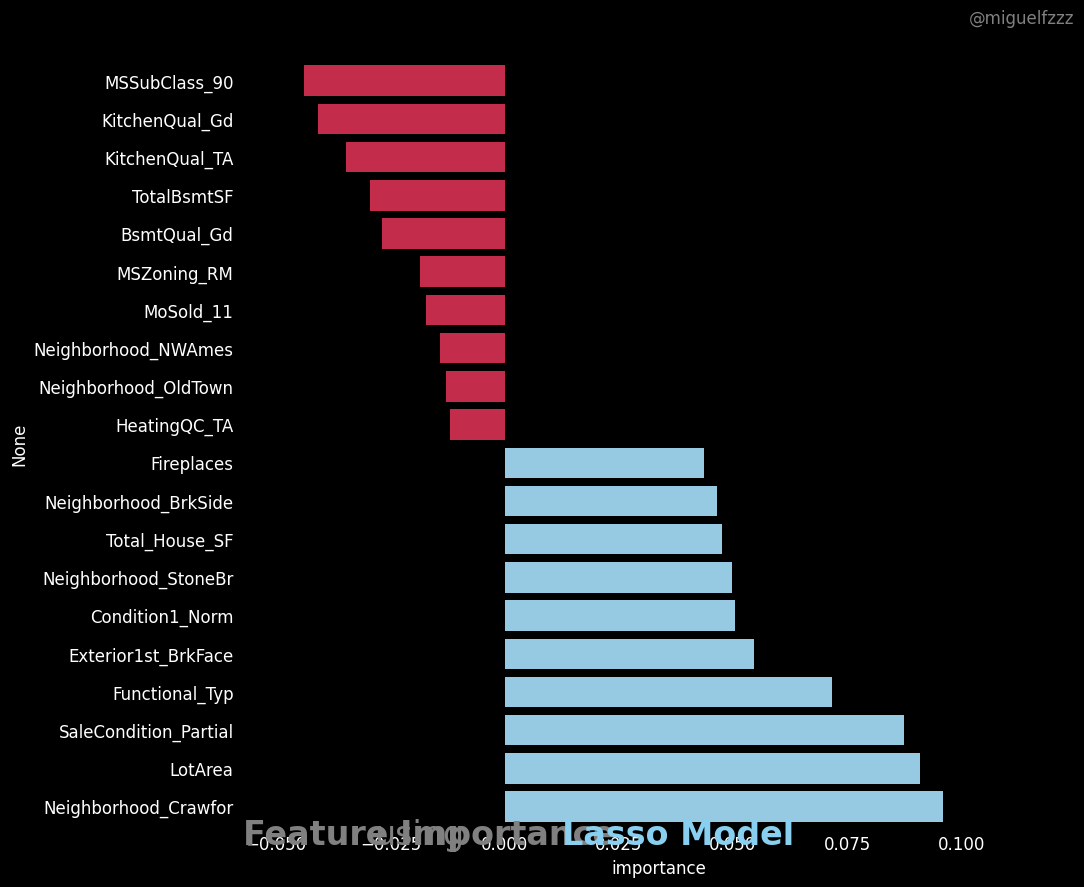

In [ ]:
# feature importances

coefs=pd.Series(lasso_tuned.coef_, index=test.columns)
lasso_coefs = pd.concat([coefs.sort_values().head(10),
                        coefs. sort_values().tail(10)])

lasso_coefs = pd.DataFrame(lasso_coefs, columns=['importance'])

# ÏãúÍ∞ÅÌôî ÏãúÏûë
# ÏãúÍ∞ÅÏ†Å Ìè≠ Ï∞®Ïù¥ Ï°∞Ï†ï + ÌÖçÏä§Ìä∏ ÏúÑÏπò ÏàòÏ†ï Î≤ÑÏ†Ñ

plt.figure(figsize=(11, 9))
ax = sns.barplot(
    y=lasso_coefs.index,
    x=lasso_coefs['importance'],
    palette=['crimson' if val < 0 else '#89CFF0' for val in lasso_coefs['importance']]
)

# Î∞∞Í≤Ω ÏÑ§Ï†ï
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Ï∂ïÍ≥º ÌÖåÎëêÎ¶¨ Ï†úÍ±∞
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis='x', colors='white', bottom=False)
ax.tick_params(axis='y', colors='white', left=False)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# xÏ∂ïÏùò ÏãúÍ∞Å Ìè≠ Í∞ïÏ°∞ (Ï¢åÏö∞Î°ú Ï°∞Í∏à Îçî padding)
x_min = lasso_coefs['importance'].min() * 1.3
x_max = lasso_coefs['importance'].max() * 1.3
ax.set_xlim(x_min, x_max)

# ÌÖçÏä§Ìä∏ ÏúÑÏπò Ï°∞Ï†ï
y_top = len(lasso_coefs) - 0.5
plt.text(x_min, y_top + 0.5, "Feature Importance", size=24, color="grey", fontweight="bold")
plt.text(x_min * 0.5, y_top + 0.5, "using", size=24, color="grey")
plt.text(x_max * 0.1, y_top + 0.5, "Lasso Model", size=24, color="#89CFF0", fontweight="bold")

# Author
plt.text(x_max, -1.5, "@miguelfzzz", fontsize=12, ha="right", color='grey')

plt.tight_layout()
plt.show()


ÌååÎûÄÏÉâÏúºÎ°ú ÌëúÏãúÎêú Î™®Îì† ÌäπÏßïÎì§ÏùÄ Ï£ºÌÉù ÌåêÎß§ Í∞ÄÍ≤©Ïóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•
Ï¶â, Ïù¥Îü¨Ìïú ÌäπÏßïÏù¥ ÏûàÏùÑÏàòÎ°ù ÏßëÍ∞íÏù¥ Ïò¨ÎùºÍ∞ÑÎã§Îäî ÏùòÎØ∏

Î∞òÎåÄÎ°ú, Îπ®Í∞ÑÏÉâÏúºÎ°ú ÌëúÏãúÎêú Î™®Îì† ÌäπÏßïÎì§ÏùÄ Ï£ºÌÉù ÌåêÎß§ Í∞ÄÍ≤©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•
Ï¶â, Ïù¥Îü¨Ìïú ÌäπÏßïÏù¥ Í∞ïÌï†ÏàòÎ°ù ÏßëÍ∞íÏù¥ ÎÇÆÏïÑÏßà Ïàò ÏûàÎã§Îäî ÏùòÎØ∏